In [8]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### import data

In [9]:
import os
import pandas as pd

def process_commit_history(csv_file, current_time="2024-1-1"):
    df = pd.read_csv(csv_file)
    
    # Drop rows where 'date' is null to avoid NaT values
    df = df.dropna(subset=['date'])
    
    # If DataFrame is empty after dropping null dates, skip this file
    if df.empty:
        return None
    
    df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)
    df['timestamp'] = df['date'].astype('datetime64[s]')  
    df = df.sort_values(by=['timestamp'], ascending=True)
    df['interval'] = df['timestamp'].diff().dt.total_seconds()
    
    Z = df['interval'].max()
    percentile_95 = df['interval'].dropna().quantile(0.95)
    T = pd.to_datetime(current_time)
    T_X_n = (T - df['timestamp'].iloc[-1]).total_seconds()
    time_since_last_commit_days = T_X_n / (60 * 60 * 24) 
    
    classification = "unknown"
    if T_X_n > Z:
        classification = "dead"
    elif T_X_n < percentile_95:
        classification = "alive"
    
    repo_name = os.path.basename(csv_file).split('.')[0]
    return {
        'Repo': repo_name,
        'Z': Z,
        'T_X_n': T_X_n,
        'Percentile_95': percentile_95,
        'Classification': classification,
        'TimeSinceLastCommit': time_since_last_commit_days
    }

folder_path = '/Users/ethan/Documents/Data science/MQP/main_repo_df/Data/CommitData'  
results_list = []  

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        csv_path = os.path.join(folder_path, file_name)
        result = process_commit_history(csv_path)
        if result:  # Only add if result is not None
            results_list.append(result)

# Use pd.concat to create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)


C:\Users\ethan\AppData\Local\Temp\ipykernel_18428\2472768683.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)
C:\Users\ethan\AppData\Local\Temp\ipykernel_18428\2472768683.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)


In [10]:
results_df.head(1)

,Repo,Z,T_X_n,Percentile_95,Classification,TimeSinceLastCommit
0,C_0voice_campus_recruitmen_questions,1468386.0,74169553.0,5936.6,dead,858.4439


In [11]:
results_df['TimeSinceLastCommit'].describe()

count    1752.000000
mean      729.927455
std       934.565612
min     -2018.650914
25%        32.861458
50%       282.972251
75%      1180.151539
max      5020.900463
Name: TimeSinceLastCommit, dtype: float64

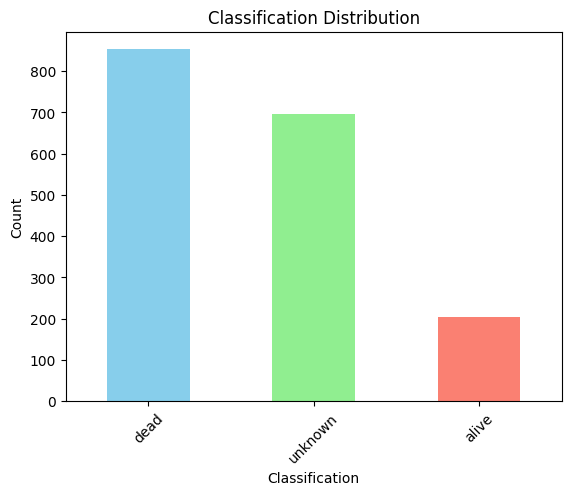

In [12]:
import matplotlib.pyplot as plt

classification_counts = results_df['Classification'].value_counts()
classification_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Classification Distribution')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Dead repos 

In [13]:
dead_repos_df = results_df[results_df['Classification'] == 'dead']


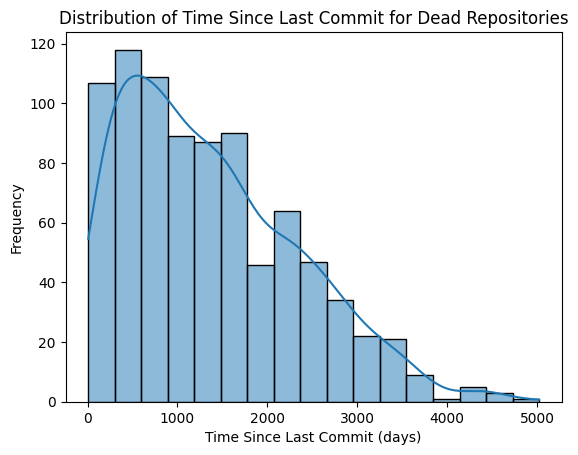

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of "Time Since Last Commit" for "dead" repositories
sns.histplot(dead_repos_df['TimeSinceLastCommit'], kde=True)
plt.title('Distribution of Time Since Last Commit for Dead Repositories')
plt.xlabel('Time Since Last Commit (days)')
plt.ylabel('Frequency')
plt.show()


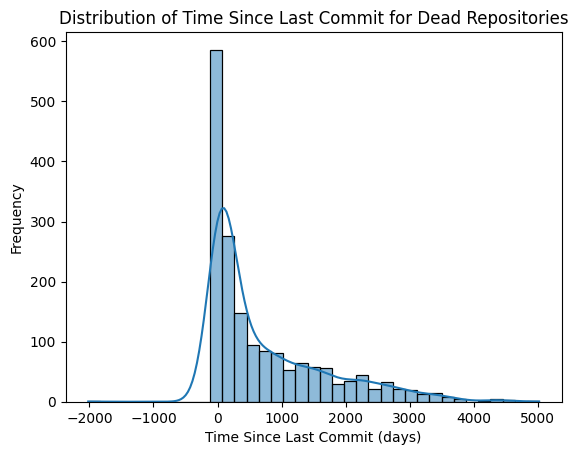

In [15]:
# Plotting the distribution of "Time Since Last Commit" for "dead" repositories
sns.histplot(results_df['TimeSinceLastCommit'], kde=True)
plt.title('Distribution of Time Since Last Commit for Dead Repositories')
plt.xlabel('Time Since Last Commit (days)')
plt.ylabel('Frequency')
plt.show()

#### Alive repos 

In [16]:
alive_repos_df = results_df[results_df['Classification'] == 'alive']


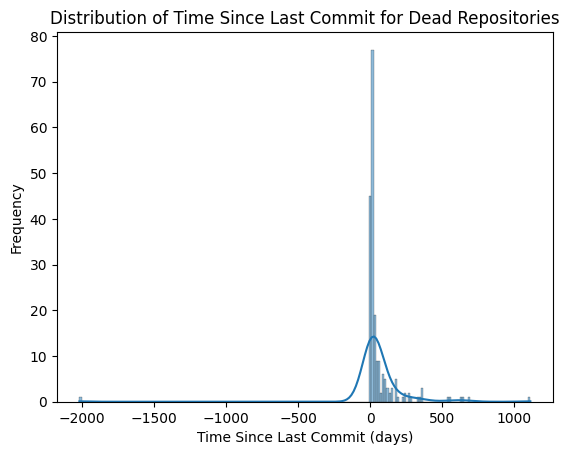

In [17]:
# Plotting the distribution of "Time Since Last Commit" for "dead" repositories
sns.histplot(alive_repos_df['TimeSinceLastCommit'], kde=True)
plt.title('Distribution of Time Since Last Commit for Dead Repositories')
plt.xlabel('Time Since Last Commit (days)')
plt.ylabel('Frequency')
plt.show()

#### Dead repos 

In [18]:
dead_repos_df = results_df[results_df['Classification'] == 'dead']


In [19]:
#### Dead repos 
dead_repos_df = results_df[results_df['Classification'] == 'dead']
